# Blatt 7

## Aufgabe 14

### a)

Um gut mit großen Datensätzen arbeiten zu können ist es oft nötig, die Anzahl der Dimensionen, bzw. Attribute, zu verringern. Wenn in einem Datensatz also $N$ Punkte aufgenommen wurden, zu denen jeweils $d$ Dimensionen gehören, sollen durch die Hauptkomponentenanalyse $k$ Dimensionen ausgewählt werden, die den Datensatz bestmöglich beschreiben.
Es wird also der Datensatz in eine neue Basis transformiert, wobei eventuell Dimensionen verworfen bzw. zusammengefasst werden. Für diese Basis werden nur die Basisvektoren ausgewählt, die die Varianz maximieren. 

Die Schritte einer Hauptkomponentenanalyse sind:
 
1. Zentrieren 

    Zunächst werden die Mittelwertvektoren berechnet, deren Komponenten jeweils die Mittelwerte der Attribute
sind. Um den Datensatz dann darum zu zentrieren, werden neue Variablen definiert nach $x_i' = x_i - \mu$.


2. Kovarianzmatrix

    Im zweiten Schritt wird durch die Kovarianzmatrix des Datensatzes berechnet mithilfe von $\text{cov}(x) = \text{E}[(x_i' \cdot x_i'^T)]$.
    
    
3. Eigenwerte und -vektoren

    Zur Bildung der neuen Basis werden die Eigenwerte und -vektoren der Kovarianzmatrix berechnet.
    
    
4. Sortierung

    Um die Eigenvektoren mit der größten Varianz zu identifizieren, werden die Eigenwerte absteigend sortiert, sodass die $k$ größten Eigenwerte ausgewählt und die Weiteren verworfen werden können.
    
    
5. Bildung der Transformationsmatrix

    Die $k$ ausgewählten Eigenvektoren werden als Spalten in die Transformationsmatrix $W$ geschrieben.
    
    
6. Transformierung

    Durch Anwenden der Matrix $W$ auf die Datenpunkte ergibt sich der transformierte Datensatz in der neuen Basis, nun mit reduzierten Dimensionen. Im Idealfall sollte trotzdem noch nahezu alle Information erhalten sein.

## Aufgabe 15
### a)

Nun wird ein Datensatz mit sklearn erstellt. Wie in der Aufgabenstellung verlangt wird dazu die make_blobs Funktion verwendet.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples = 1000, centers = 2, n_features = 4, random_state = 0)

(1000, 4)


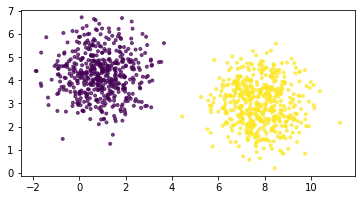

In [13]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.scatter(X[:, 3], X[:, 1], c=y, alpha=0.7, marker='.')
print(X.shape)

### b)

Für die Hauptkomponentenanalyse wird das Paket sklearn.decomposition.PCA verwendet.

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_prime = pca.fit_transform(X) # transformiere die Daten

with np.printoptions(precision=2):
    print('sklearn:\n', X_prime)

sklearn:
 [[-3.12 -0.5  -0.59 -0.41]
 [ 4.08 -0.28  1.17 -0.23]
 [-4.44  1.03  0.37 -0.38]
 ...
 [-5.29 -0.23 -0.82  0.66]
 [-5.09 -0.47  0.15  1.07]
 [-4.31 -0.21 -0.37  1.6 ]]


Des Weiteren sollen die Eigenwerte der Konvergenzmatrix ausgerechnet werden.

In [7]:
cov = np.cov(X, rowvar=False) # Funktion aus numpy, mit der sich die Kovarianzmatrix berechnen lässt
print('Kovarianzmatrix: \n', cov, '\n')

# berechne Eigenwerte
eigw, eigv = np.linalg.eigh(cov)

# sortiere in aufsteigender Reihenfolge, eigh macht automatisch eine absteigende Reihenfolge.
eigw = eigw[::-1]
eigv = eigv[:, ::-1]

print('Eigenwerte:\n', eigw, '\n')
print('Eigenvektoren:\n', eigv, '\n')

Kovarianzmatrix: 
 [[ 2.62583302  0.80302067  2.12234349 -4.3783228 ]
 [ 0.80302067  1.33533433  1.09428645 -2.18876646]
 [ 2.12234349  1.09428645  3.69087992 -5.66291375]
 [-4.3783228  -2.18876646 -5.66291375 12.75375474]] 

Eigenwerte:
 [17.51933024  0.99958442  0.98813673  0.89875061] 

Eigenvektoren:
 [[-0.31432743 -0.81331229 -0.45174256 -0.1888122 ]
 [-0.15713986 -0.04672846  0.53883501 -0.82630524]
 [-0.40611949 -0.33530128  0.66484304  0.52973932]
 [ 0.84354745 -0.47319407  0.25212938  0.03075479]] 



Es ist klar ersichtlich, dass die Varianz einer Komponente am höchsten ist, auch deutlich größer als die Varianzen der anderen Komponenten, die sich nur gering voneinander unterscheiden. Dabei handelt es sich um die letzte Komponente.

### c)

Zuletzt sollen $x'$ in jeder Dimension histogrammiert werden sowie $x_1'$ und $x_2'$ in einem Scatterplot dargestellt werden.

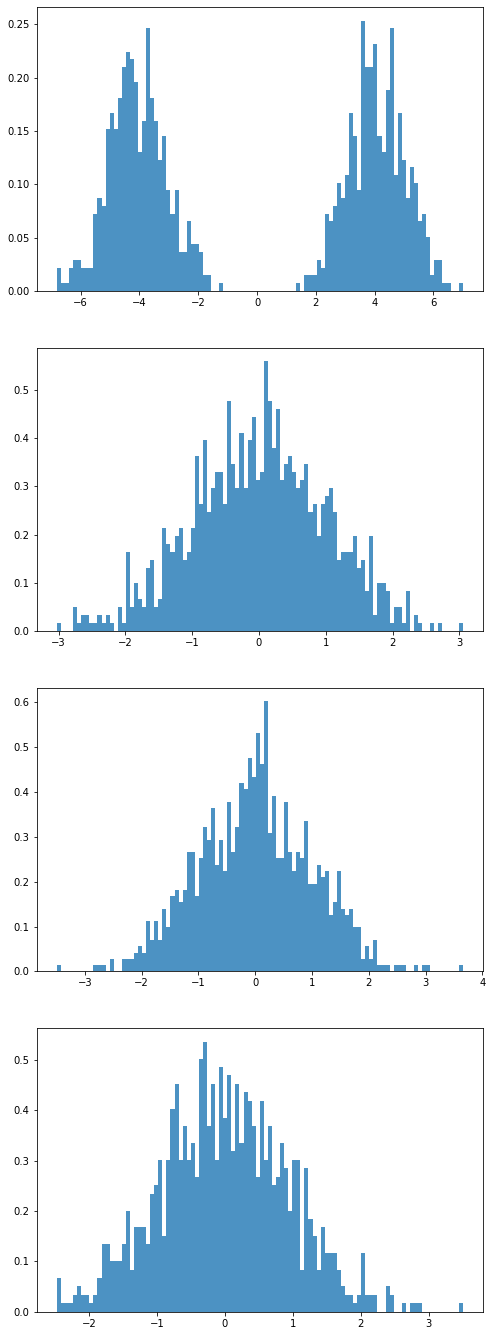

In [8]:
fig, axs = plt.subplots(4, figsize=(8, 24))

axs[0].hist(X_prime[:, 0], bins=100, alpha=0.8, density=True)
axs[1].hist(X_prime[:, 1], bins=100, alpha=0.8, density=True)
axs[2].hist(X_prime[:, 2], bins=100, alpha=0.8, density=True)
axs[3].hist(X_prime[:, 3], bins=100, alpha=0.8, density=True)

plt.show()

(1000, 4)


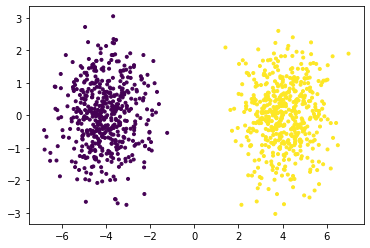

In [9]:
plt.figure()
plt.scatter(X_prime[:, 0], X_prime[:, 1], c=y, alpha=1, marker='.')

print(X_prime.shape)

Die beiden Blobs sind nun klar voneinander getrennt. 